<ipython-input-1-74f6b4a49f96>:10: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(dataset_path)


Water Temperature vs Salinity - R^2: 0.25547831643627206


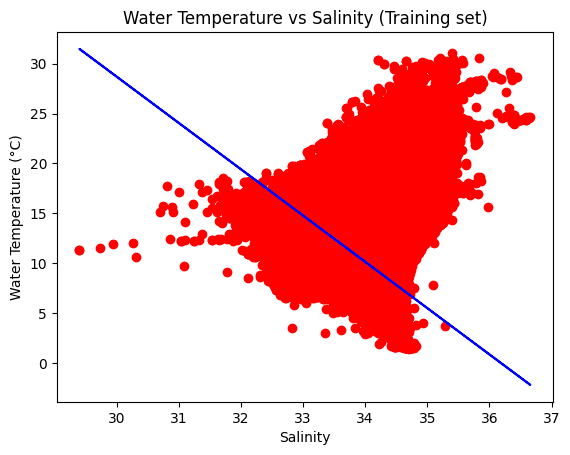

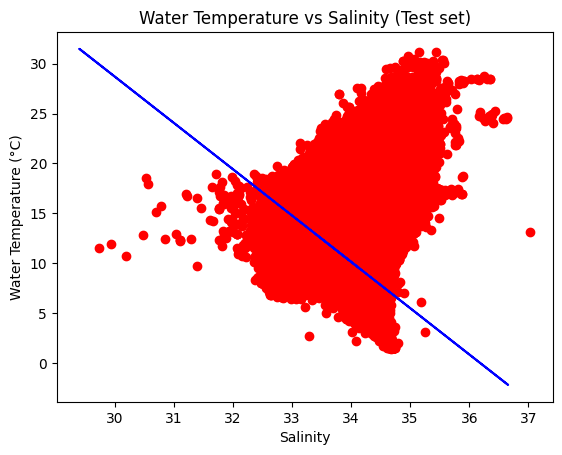

Water Temperature vs Depth - R^2: 0.44200660072611375


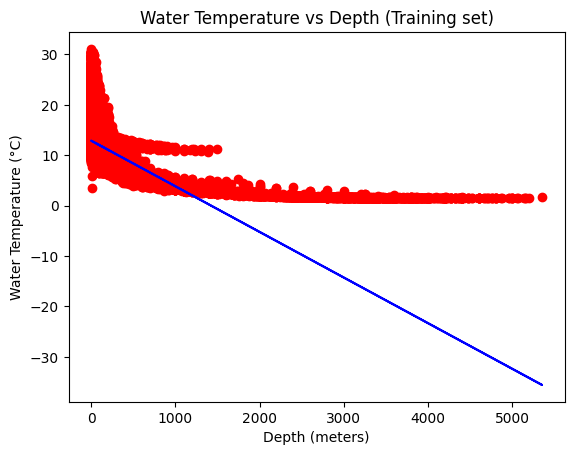

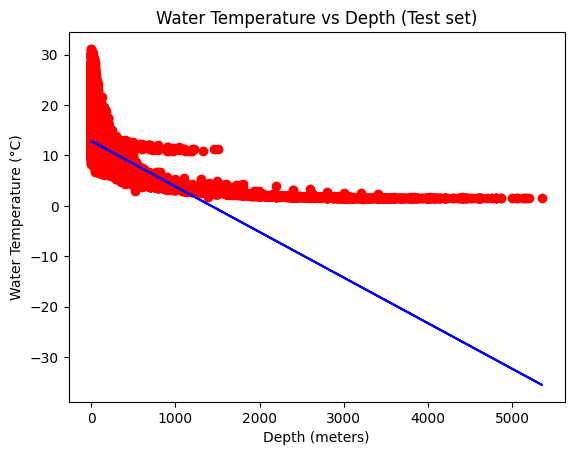

Water Temperature vs Oxygen - R^2: 0.6323031813961993


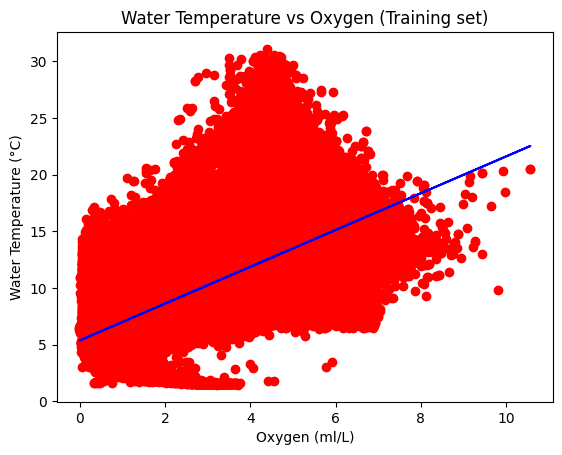

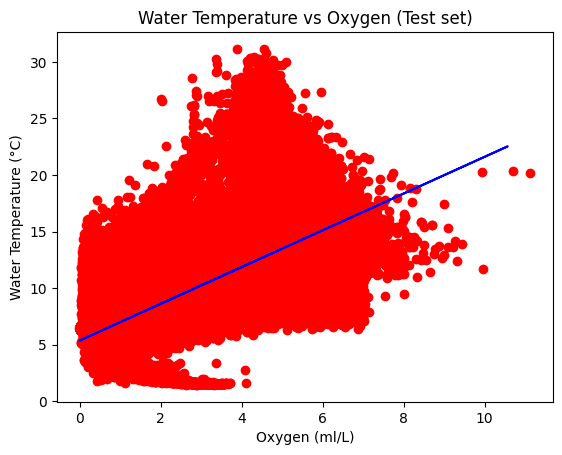

In [1]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Loading the dataset

dataset_path = '/content/drive/MyDrive/Colab Notebooks/bottle.csv'
dataset = pd.read_csv(dataset_path)
# Cleaning the dataset
dataset = dataset.dropna(subset=['T_degC', 'Salnty', 'Depthm', 'O2ml_L'])

# function to perform regression and plotting for a given independent variable
def perform_regression_and_plot(X, y, title, xlabel, ylabel):
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

    # Training the Simple Linear Regression model on the Training set
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = regressor.predict(X_test)

    # Calculating R^2 score for the test set
    r_squared = regressor.score(X_test, y_test)
    print(f'{title} - R^2: {r_squared}')

    # Visualising the Training set results
    plt.scatter(X_train, y_train, color = 'red')
    plt.plot(X_train, regressor.predict(X_train), color = 'blue')
    plt.title(title + ' (Training set)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    # Visualising the Test set results
    plt.scatter(X_test, y_test, color = 'red')
    plt.plot(X_train, regressor.predict(X_train), color = 'blue') # Using the training set for the line
    plt.title(title + ' (Test set)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Selecting the dependent variable
y_temp = dataset['T_degC'].values

# Performing regression for Salnty
X_salnty = dataset[['Salnty']].values
perform_regression_and_plot(X_salnty, y_temp, 'Water Temperature vs Salinity', 'Salinity', 'Water Temperature (°C)')

# Performing regression for Depthm
X_depth = dataset[['Depthm']].values
perform_regression_and_plot(X_depth, y_temp, 'Water Temperature vs Depth', 'Depth (meters)', 'Water Temperature (°C)')

# Performing regression for O2ml_L
X_oxygen = dataset[['O2ml_L']].values
perform_regression_and_plot(X_oxygen, y_temp, 'Water Temperature vs Oxygen', 'Oxygen (ml/L)', 'Water Temperature (°C)')
